# Scrape Content

In [ ]:
Topic_amount = 10000

In [ ]:
import requests
import pandas as pd
from pandas import json_normalize
 
def getPantipList(room, limit, topic_type, next_id, amount) :
  global df
  topic_count = 0
  while topic_count < amount :
      url = "https://pantip.com/api/forum-service/forum/room_topic"
      payload = {'room': room, 'limit': limit, 'topic_type': topic_type , 'next_id': next_id}
      headers = {
        'Content-Type': 'application/json',
        'Pragma': 'no-cache',
        'Ptauthorize': 'Basic dGVzdGVyOnRlc3Rlcg==',
        'Referer': 'https://pantip.com/forum/blueplanet',
        'Cookie': 'pantip_visitc=q72nocniw1np0Sk4vWL; _ga=GA1.2.796963989.1584001890; __gads=ID=a4cea70608d6d1cd:T=1584001890:S=ALNI_MYJloKvjdFj1wduNvq-VzJnIY7uMw; iUUID=d4f5e3437f93aa0ddfa337993ccb01b8; __bTech_p=f1cd9633-73a7-4398-9d97-a74eaafa5602; _em_vt=66960212-eeca-4af0-a3e0-17b470ad97a1-171fa213cc0-9073e329; _em_gc=TH; _em_mb=0; _em_dmp=1591875377356; PHPSESSID=qj6at7a8322tl9a0a975pqmd07; oppa.fuuid=dfd9448b-83a7-4136-8fac-e895b0292f7b; _gid=GA1.2.173407721.1600942418; GED_PLAYLIST_ACTIVITY=W3sidSI6IjNWYUIiLCJ0c2wiOjE2MDEwMDA1MTUsIm52IjowLCJ1cHQiOjE2MDEwMDA0NzksImx0IjoxNjAxMDAwNTAxfV0.; freq.5f47739647e7049101000004=1; innity.dmp.cks.appxs=1; innity.dmp.cks.innity=1; real_referer=%3A%2F%2Fpantip.com%2Fs%2FjDEG2; rlr=40221078; pantip_sessions=0LkFIEJeZVyxugjzeqakuQD8tFadwesmAjDbewDz5rcOlWi36L2rLArGTNzut0KiMiCMuJ6ace4vqZhHLKoS9j9tniB9QU4bhBW7JyHbyMPwSFoq0eM8pxq4JN5kvRVbApVWi39qaIvLTImb94aQ6eR18MvRmPQe8k4AN%2BvuiMW%2FqDfU6VlTdgAIaGHnpInQuq4tGTj%2BTPB%2BbFPpaCVJqzq91K4WnukIvRd6aI6ZlhHLg0zNeEFLLqUyNPh%2F95jec7hEDHOqKVSCspc76dl3tUDbf6LBCaujkXK71ofJeo2hOTw9EeMYZhtg%2Bg%2FRqKh73uZCVweo56VuP%2BVGQbRqzA%3D%3D'
      }
      response = requests.request("GET", url, headers=headers, params = payload, timeout=5)
      data = response.json()
      if topic_count == 0 :
        df = json_normalize(data['data'])
      else :
        df = df.append(json_normalize(data['data']))
      topic_count = df.topic_id.count()
      next_id = data['next_id']
      # print(df.explode('tags'))
      # print('Topic Count = ', topic_count)
  print('Get data completely')
  return True
 
if getPantipList('blueplanet', 100, 4, None, Topic_amount) == True :
  data = df
  # print(data)
  data.to_csv("topic_list.csv", index=False)
  print('Create file success!!')

Get data completely
Create file success!!


In [ ]:
import pandas as pd

df_topic=pd.read_csv('topic_list.csv')

In [ ]:
df_topic.head()

,topic_id,title,topic_type,created_time,thumbnail_url,views_count,comments_count,votes_count,is_cr,is_sr,is_br,tags,author.id,author.name,author.avatar.original,author.avatar.large,author.avatar.medium,author.avatar.small,author.slug
0,40643404,ทริปเกาะเสม็ด 3 วัน 2 คืน วันที่สองที่ทรายแก้ว...,4,2021-04-15T04:12:42Z,https://f.ptcdn.info/162/073/000/qrl7vu2hyyB12...,103,2,0,True,False,False,"[{'name': 'เกาะเสม็ด', 'slug': 'เกาะเสม็ด'}, {...",5663815,สมาชิกหมายเลข 5663815,https://p.ptcdn.info/160/012/000/5663815_15780...,https://p.ptcdn.info/160/012/000/5663815_15780...,https://p.ptcdn.info/160/012/000/5663815_15780...,https://p.ptcdn.info/160/012/000/5663815_15780...,/profile/5663815
1,40643393,… ธูษิฏา เวลเนส รีสอร์ต ชุมพร Tusita Wellnes...,4,2021-04-15T04:04:54Z,https://f.ptcdn.info/162/073/000/qrl77y2o59XaJ...,106,8,0,False,True,False,"[{'name': 'บันทึกนักเดินทาง', 'slug': 'บันทึกน...",435932,แม่ประนอม นะจ๊ะ,http://p.ptcdn.info/416/000/000/435932_0138661...,https://p.ptcdn.info/416/000/000/435932_013866...,https://p.ptcdn.info/416/000/000/435932_013866...,https://p.ptcdn.info/416/000/000/435932_013866...,/profile/435932
2,40643087,พาชม สนามกอล์ฟ ศูนย์สร้างทางลำปาง กรมทางหลวง (...,4,2021-04-14T21:33:35Z,https://f.ptcdn.info/160/073/000/qrko9c3s8jTX3...,257,11,1,True,False,False,"[{'name': 'กอล์ฟ', 'slug': 'กอล์ฟ'}, {'name': ...",280317,kugar,NaN,https://ptcdn.info/images/avatar_member_defaul...,https://ptcdn.info/images/avatar_member_defaul...,https://ptcdn.info/images/avatar_member_defaul...,/profile/280317
3,40642333,Copenhagen : Summer days - ฤดูร้อนในโคเปนเฮเกน...,4,2021-04-14T11:26:14Z,https://f.ptcdn.info/157/073/000/qrjx034lzgmO4...,330,13,0,True,False,False,"[{'name': 'โคเปนเฮเกน', 'slug': 'โคเปนเฮเกน'},...",3104199,gloygloygloy,http://p.ptcdn.info/838/006/000/3104199_561453...,https://p.ptcdn.info/838/006/000/3104199_56145...,https://p.ptcdn.info/838/006/000/3104199_56145...,https://p.ptcdn.info/838/006/000/3104199_56145...,/profile/3104199
4,40642260,📌 แจกพิกัด 6 ทุ่งดอกไม้หลากสีทั่วญี่ปุ่น ที่ไม...,4,2021-04-14T10:39:59Z,https://f.ptcdn.info/156/073/000/qrjqsiuqdJhpJ...,120,0,0,True,False,False,"[{'name': 'เที่ยวญี่ปุ่น', 'slug': 'เที่ยวญี่ป...",5103160,สมาชิกหมายเลข 5103160,https://p.ptcdn.info/282/011/000/5103160_02660...,https://p.ptcdn.info/282/011/000/5103160_02660...,https://p.ptcdn.info/282/011/000/5103160_02660...,https://p.ptcdn.info/282/011/000/5103160_02660...,/profile/5103160


In [ ]:
from bs4 import BeautifulSoup
import requests
content  = []
topic_id = []
for topicId in df_topic['topic_id']:
  # print(1, topicId)
  url = requests.get("https://pantip.com/topic/%s" % (topicId))
  soup = BeautifulSoup(url.content, "html.parser")
  classToIgnore = ["review-section", "edit-history"]
  for script in soup(["script", "style"]): # remove all javascript and stylesheet
    script.decompose()
  for div in soup.find_all('div', class_=lambda x: x in classToIgnore): # remove review-section & edit-history class
    div.decompose()
  data = soup.find("div",{"class":"display-post-story"})
  content.append(data.text)
  topic_id.append(topicId)
df_content = pd.DataFrame({'topic_id':topic_id, 'title':df['title'], 'content':content, 'tags': df['tags']})
# print(df_content)
content_data = df_content
# print(content_data)
content_data.to_csv("pantip_content_list.csv", index=False)
print('Create Content file success!!')

Create Content file success!!


In [ ]:
content_data

,topic_id,title,content,tags
0,40643404,ทริปเกาะเสม็ด 3 วัน 2 คืน วันที่สองที่ทรายแก้ว...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tคืนแรกที่เ...,"[{'name': 'เกาะเสม็ด', 'slug': 'เกาะเสม็ด'}, {..."
1,40643393,… ธูษิฏา เวลเนส รีสอร์ต ชุมพร Tusita Wellnes...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t. ธูษิ...,"[{'name': 'บันทึกนักเดินทาง', 'slug': 'บันทึกน..."
2,40643087,พาชม สนามกอล์ฟ ศูนย์สร้างทางลำปาง กรมทางหลวง (...,\n\nใบสนร่วงให้ฟีลแผ่นดินสีทอง สวยไปอีกแบบครับ...,"[{'name': 'กอล์ฟ', 'slug': 'กอล์ฟ'}, {'name': ..."
3,40642333,Copenhagen : Summer days - ฤดูร้อนในโคเปนเฮเกน...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tทริปนี้เป็...,"[{'name': 'โคเปนเฮเกน', 'slug': 'โคเปนเฮเกน'},..."
4,40642260,📌 แจกพิกัด 6 ทุ่งดอกไม้หลากสีทั่วญี่ปุ่น ที่ไม...,\nถ้าพูดถึงดอกไม้ของญี่ปุ่นหลายๆคนคงจะนึกถึงดอ...,"[{'name': 'เที่ยวญี่ปุ่น', 'slug': 'เที่ยวญี่ป..."
...,...,...,...,...
95,38727277,รีวิวกระทู้แต่ละประเทศ Natherland - Belgium - ...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tตอน.3 ลักเ...,"[{'name': 'เที่ยวต่างประเทศ', 'slug': 'เที่ยวต..."
96,38727267,รีวิวกระทู้แต่ละประเทศ Natherland - Belgium - ...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tตอน.2 Bel...,"[{'name': 'สถานที่ท่องเที่ยวต่างประเทศ', 'slug..."
97,38727253,รีวิวกระทู้แต่ละประเทศ Natherland - Belgium - ...,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t""ใครแวะมาอ...","[{'name': 'เที่ยวต่างประเทศ', 'slug': 'เที่ยวต..."
98,38727028,ภูเก็ต - ฮองกง ฉบับคนงบน้อยเที่ยวทั่วฮองกง,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t😀เริ่มจากเ...,"[{'name': 'เที่ยวต่างประเทศ', 'slug': 'เที่ยวต..."


In [ ]:
content_data.shape

(10000, 4)

# Preporcess

## Load Data

In [ ]:
import requests
import pandas as pd
import numpy as np
from pandas import json_normalize
import json
from collections import Counter


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense,Flatten, SpatialDropout1D, concatenate
from tensorflow.keras.layers import GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,Conv1D, Conv2D,MaxPool2D,GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.python.keras.layers.merge import Dot
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

In [ ]:
!gdown --id 1Ui3tGidXbHfEvTJLSRZpcxXlohWFM_hz

Downloading...
From: https://drive.google.com/uc?id=1Ui3tGidXbHfEvTJLSRZpcxXlohWFM_hz
To: /content/pantip_content_list.csv
81.4MB [00:01, 61.8MB/s]


In [ ]:
df_content = pd.read_csv("pantip_content_list.csv")

In [ ]:
df_content.head()

,topic_id,title,content,tags
0,40643404,ทริปเกาะเสม็ด 3 วัน 2 คืน วันที่สองที่ทรายแก้ว...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tคืนแรกที่เ...,"[{'name': 'เกาะเสม็ด', 'slug': 'เกาะเสม็ด'}, {..."
1,40643393,… ธูษิฏา เวลเนส รีสอร์ต ชุมพร Tusita Wellnes...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t. ธูษิ...,"[{'name': 'บันทึกนักเดินทาง', 'slug': 'บันทึกน..."
2,40643087,พาชม สนามกอล์ฟ ศูนย์สร้างทางลำปาง กรมทางหลวง (...,\n\nใบสนร่วงให้ฟีลแผ่นดินสีทอง สวยไปอีกแบบครับ...,"[{'name': 'กอล์ฟ', 'slug': 'กอล์ฟ'}, {'name': ..."
3,40642333,Copenhagen : Summer days - ฤดูร้อนในโคเปนเฮเกน...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tทริปนี้เป็...,"[{'name': 'โคเปนเฮเกน', 'slug': 'โคเปนเฮเกน'},..."
4,40642260,📌 แจกพิกัด 6 ทุ่งดอกไม้หลากสีทั่วญี่ปุ่น ที่ไม...,\nถ้าพูดถึงดอกไม้ของญี่ปุ่นหลายๆคนคงจะนึกถึงดอ...,"[{'name': 'เที่ยวญี่ปุ่น', 'slug': 'เที่ยวญี่ป..."


## Tag (Y) Preprocessing

In [ ]:
tag_count = []
tags_temp = []

i = 0
for index, row in df_content.iterrows():
  tags = json.loads(json.dumps(eval(row['tags'])))
  temp = []
  for tag in tags:
    temp.append(tag['slug'])
    tag_count.append(tag['slug'])
  tags_temp.append(temp)

df_content['tags'] = tags_temp
tag_count = Counter(tag_count)

In [ ]:
n_tags = int(0.05*len(tag_count))
n_tags

70

In [ ]:
Top_tags = sorted(tag_count.items(), key=lambda item: item[1], reverse=True)[:n_tags]
print(Top_tags)

[('บันทึกนักเดินทาง', 5099), ('เที่ยวไทย', 2957), ('เที่ยวต่างประเทศ', 2443), ('สถานที่ท่องเที่ยวต่างประเทศ', 1676), ('สถานที่ท่องเที่ยวในประเทศ', 1651), ('Backpack', 1435), ('โรงแรมรีสอร์ท', 1201), ('ภาพถ่ายทิวทัศน์', 1106), ('เที่ยวทะเล', 1067), ('เที่ยวญี่ปุ่น', 950), ('เที่ยวภูเขา', 833), ('ท่องเที่ยว', 727), ('สถานที่ท่องเที่ยว', 582), ('นักท่องเที่ยว', 551), ('One_Day_Trip', 535), ('ร้านอาหาร', 501), ('โรงแรมรีสอร์ทไทย', 467), ('ภาพถ่ายจากกล้องโทรศัพท์', 454), ('คาเฟ่_(Cafe)', 452), ('ประเทศญี่ปุ่น', 450), ('เที่ยวเชิงอนุรักษ์', 442), ('ภาพถ่าย', 426), ('สถานที่ท่องเที่ยวกรุงเทพฯ', 407), ('สถานที่ท่องเที่ยวสำหรับครอบครัว', 393), ('Slow_Life', 389), ('เที่ยวยุโรป', 361), ('เดินป่า', 332), ('แผนการเดินทางและท่องเที่ยว', 330), ('จังหวัดเชียงใหม่', 280), ('ร้านกาแฟ', 260), ('สายการบิน', 245), ('การท่องเที่ยวแห่งประเทศไทย', 214), ('โตเกียว', 193), ('พัทยา', 185), ('เที่ยววัด', 180), ('เที่ยวน้ำตก', 179), ('จังหวัดภูเก็ต', 174), ('ที่พัก', 166), ('โฮมสเตย์', 162), ('สถานที่ถ่ายรูป', 15

In [ ]:
idx_to_tag = {}
tag_to_idx = {}
i = 0
for tag in Top_tags:
  if tag[0] not in tag_to_idx:
    tag_to_idx[tag[0]] = i
    i += 1
idx_to_tag = {v: k for k, v in tag_to_idx.items()}

In [ ]:
print(idx_to_tag)

{0: 'บันทึกนักเดินทาง', 1: 'เที่ยวไทย', 2: 'เที่ยวต่างประเทศ', 3: 'สถานที่ท่องเที่ยวต่างประเทศ', 4: 'สถานที่ท่องเที่ยวในประเทศ', 5: 'Backpack', 6: 'โรงแรมรีสอร์ท', 7: 'ภาพถ่ายทิวทัศน์', 8: 'เที่ยวทะเล', 9: 'เที่ยวญี่ปุ่น', 10: 'เที่ยวภูเขา', 11: 'ท่องเที่ยว', 12: 'สถานที่ท่องเที่ยว', 13: 'นักท่องเที่ยว', 14: 'One_Day_Trip', 15: 'ร้านอาหาร', 16: 'โรงแรมรีสอร์ทไทย', 17: 'ภาพถ่ายจากกล้องโทรศัพท์', 18: 'คาเฟ่_(Cafe)', 19: 'ประเทศญี่ปุ่น', 20: 'เที่ยวเชิงอนุรักษ์', 21: 'ภาพถ่าย', 22: 'สถานที่ท่องเที่ยวกรุงเทพฯ', 23: 'สถานที่ท่องเที่ยวสำหรับครอบครัว', 24: 'Slow_Life', 25: 'เที่ยวยุโรป', 26: 'เดินป่า', 27: 'แผนการเดินทางและท่องเที่ยว', 28: 'จังหวัดเชียงใหม่', 29: 'ร้านกาแฟ', 30: 'สายการบิน', 31: 'การท่องเที่ยวแห่งประเทศไทย', 32: 'โตเกียว', 33: 'พัทยา', 34: 'เที่ยววัด', 35: 'เที่ยวน้ำตก', 36: 'จังหวัดภูเก็ต', 37: 'ที่พัก', 38: 'โฮมสเตย์', 39: 'สถานที่ถ่ายรูป', 40: 'อาหาร', 41: 'เที่ยวจีน', 42: 'ภาคเหนือ', 43: 'รถไฟ', 44: 'จังหวัดกาญจนบุรี', 45: 'ดำน้ำ', 46: 'โอซาก้า', 47: 'มอเตอร์ไซค์', 48: 'ป

In [ ]:
tags_temp = []

for index, row in df_content.iterrows():
  
  temp = []
  for tag in row['tags']:
    # print(tag)
    if tag in tag_to_idx:
      temp.append(tag_to_idx[tag])
  tags_temp.append(temp)
  
df_content['idx_tags'] = tags_temp

In [ ]:
df_content.head()

,topic_id,title,content,tags,idx_tags
0,40643404,ทริปเกาะเสม็ด 3 วัน 2 คืน วันที่สองที่ทรายแก้ว...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tคืนแรกที่เ...,"[เกาะเสม็ด, เที่ยวทะเล, จังหวัดระยอง, เที่ยวไท...","[8, 1, 16]"
1,40643393,… ธูษิฏา เวลเนส รีสอร์ต ชุมพร Tusita Wellnes...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t. ธูษิ...,"[บันทึกนักเดินทาง, โรงแรมรีสอร์ท, จังหวัดชุมพร...","[0, 6, 8, 16]"
2,40643087,พาชม สนามกอล์ฟ ศูนย์สร้างทางลำปาง กรมทางหลวง (...,\n\nใบสนร่วงให้ฟีลแผ่นดินสีทอง สวยไปอีกแบบครับ...,"[กอล์ฟ, กีฬาผู้สูงอายุ, เที่ยวไทย, จังหวัดลำปา...",[1]
3,40642333,Copenhagen : Summer days - ฤดูร้อนในโคเปนเฮเกน...,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tทริปนี้เป็...,"[โคเปนเฮเกน, เที่ยวยุโรป, บันทึกนักเดินทาง, ปร...","[25, 0, 3]"
4,40642260,📌 แจกพิกัด 6 ทุ่งดอกไม้หลากสีทั่วญี่ปุ่น ที่ไม...,\nถ้าพูดถึงดอกไม้ของญี่ปุ่นหลายๆคนคงจะนึกถึงดอ...,"[เที่ยวญี่ปุ่น, ฮอกไกโด, โตเกียว, โอซาก้า, สถา...","[9, 61, 32, 46, 3]"


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_content['idx_tags'])

y = multilabel_binarizer.transform(df_content['idx_tags'])

In [ ]:
# # Exclude topic without Top tags.
# df_content = df_content[df_content['idx_tags'].apply(lambda x: len(x)) > 0]

In [ ]:
# tags_temp = []
# zero_list = [0] * n_tags
# for index, row in df_content.iterrows():

#   if row['idx_tags'] != []:
#     temps = to_categorical(row['idx_tags'], num_classes=n_tags)
#     max_temps = np.maximum(temps[0], zero_list)

#     for temp in temps:
#       max_temps = np.maximum(temp, max_temps)
#   else:
#     max_temps = zero_list

#   tags_temp.append(max_temps)


# df_content['Y_tags'] = tags_temp

In [ ]:
cut_string = r"[\xa0\|\(\)\[\]\{\}\n\t\r-]*"

test = df_content['content'].iloc[-2]
test = "[test] {test} " + test
test

'[test] {test} \r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t😀เริ่มจากเดือนกันยายนปีที่แล้ว เริ่มวางแผน trip ตะลุย hong kong โดยกำหนดเดินทางเดือน มีนาคม 62 จากนั้นก็ตั้งตารอคอยโปรโมชั่นตั๋วถูก ในที่สุดส้มหล่นค่ะ ได้ตั๋วไป-กลับ ภูเก็ต - ฮองกง จาก www.hxexpress.com ในราคา 3400 รวมค่าธรรมเนียมบัตรเครดิต = 3846 บาท โอแม่จ้าว ถูกมวากก จากราคาปกติประมาณ 6000 บาท (ราคานี้คือลากกระเป๋าขึ้นเครื่องนะค่ะ ถ้าจะ load กระเป๋าจ่ายเพิ่มเที่ยวล่ะ 990 บาทจ้า)\n\n😀เมื่อได้ตั๋วแล้ว step ต่อไปคือการหาที่พัก เราทำการบ้านอย่างหนัก ในการเลือกโรงแรม โดยมี เงื่อนไขการจองโรงแรม 1.งบไม่เกิน 2,500 บาทต่อคืน 2.ขอเป็นโรงแรมไม่เอา guest house เพราะ guest house ห้องเล็กมากกก ไม่มีทางเดินในห้อง เปิดประตูปุ๊บจะเจอปลายเตียงทันที ห้องแบบโรงแรมยังพอมีทางเดินในห้องบ้างพอให้หายใจโล่งๆ 3. ขอโรงแรมใกล้สถานีรถไฟฟ้า เดินไม่เกิน 300 เมตร เพราะขี้เกียจเดินค่ะ 4.ขอโรงแรมที่เป็นจุดจอดของรถรับส่งสนามบิน เพราะขี้เกียจลากกระเป๋าไปขึ้นรถ หุหุ เงื่อนไขเจ้เยอะไปป่าว สุดท้ายมาลงตัวที่ NOBEL PARK HOTEL ย่าน Jodan จองผ่าน www.booking.com ในราคา 2800 บ

In [ ]:
import re
re.sub(cut_string, "", test)

'test test 😀เริ่มจากเดือนกันยายนปีที่แล้ว เริ่มวางแผน trip ตะลุย hong kong โดยกำหนดเดินทางเดือน มีนาคม 62 จากนั้นก็ตั้งตารอคอยโปรโมชั่นตั๋วถูก ในที่สุดส้มหล่นค่ะ ได้ตั๋วไปกลับ ภูเก็ต  ฮองกง จาก www.hxexpress.com ในราคา 3400 รวมค่าธรรมเนียมบัตรเครดิต = 3846 บาท โอแม่จ้าว ถูกมวากก จากราคาปกติประมาณ 6000 บาท ราคานี้คือลากกระเป๋าขึ้นเครื่องนะค่ะ ถ้าจะ load กระเป๋าจ่ายเพิ่มเที่ยวล่ะ 990 บาทจ้า😀เมื่อได้ตั๋วแล้ว step ต่อไปคือการหาที่พัก เราทำการบ้านอย่างหนัก ในการเลือกโรงแรม โดยมี เงื่อนไขการจองโรงแรม 1.งบไม่เกิน 2,500 บาทต่อคืน 2.ขอเป็นโรงแรมไม่เอา guest house เพราะ guest house ห้องเล็กมากกก ไม่มีทางเดินในห้อง เปิดประตูปุ๊บจะเจอปลายเตียงทันที ห้องแบบโรงแรมยังพอมีทางเดินในห้องบ้างพอให้หายใจโล่งๆ 3. ขอโรงแรมใกล้สถานีรถไฟฟ้า เดินไม่เกิน 300 เมตร เพราะขี้เกียจเดินค่ะ 4.ขอโรงแรมที่เป็นจุดจอดของรถรับส่งสนามบิน เพราะขี้เกียจลากกระเป๋าไปขึ้นรถ หุหุ เงื่อนไขเจ้เยอะไปป่าว สุดท้ายมาลงตัวที่ NOBEL PARK HOTEL ย่าน Jodan จองผ่าน www.booking.com ในราคา 2800 บาท/คืน เกิน budget ไปนิดหน่อย ไม่เป็นไร แลกกับเง

In [ ]:
print("Before")
print(df_content['title'].iloc[4])
print("After")
print(re.sub(cut_string, "", df_content['title'].iloc[4]))

Before
📌 แจกพิกัด 6 ทุ่งดอกไม้หลากสีทั่วญี่ปุ่น ที่ไม่ควรพลาด | MeTrip
After
📌 แจกพิกัด 6 ทุ่งดอกไม้หลากสีทั่วญี่ปุ่น ที่ไม่ควรพลาด  MeTrip


In [ ]:
df_content['clean_content'] = df_content['title'] + df_content['content']

In [ ]:
df_content['clean_content'] = df_content['clean_content'].apply(lambda x: re.sub(cut_string, "", x))

In [ ]:
Top_tags[0][1]

5099

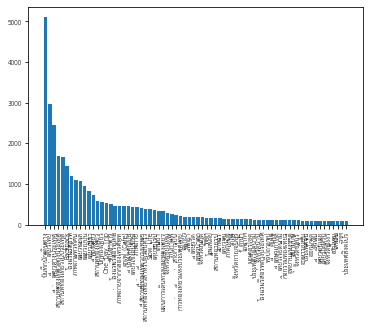

In [ ]:
import matplotlib.pyplot as plt

Tags_ = [i[0] for i in Top_tags]
Count_ = [i[1] for i in Top_tags]


plt.bar(Tags_, Count_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(15,8))
# sns.histplot(texts_train_tokenized_length, stat='density',
#              binwidth=5)

In [ ]:
# import matplotlib.pyplot as plt
# def plot(label, count):
#     fig, ax = plt.subplots()
#     ind = np.arange(len(count))
#     rects1 = ax.bar(ind, count, 0.5)

#     ax.set_ylabel('Count')
#     ax.set_title('Count for each class')
#     ax.set_xticks(ind)
#     ax.set_xticklabels(label)

#     plt.show()
    
# # class_, count = np.unique([data[1] for data in train_data], return_counts=True)
# plot(class_, count_)

## Tokenize

In [ ]:
_ = !pip install pythainlp
from pythainlp.tokenize import word_tokenize
from pythainlp.tokenize import syllable_tokenize

In [ ]:
X = df_content['clean_content'].tolist()

In [ ]:
df_content['clean_content'].tolist()[0]

'ทริปเกาะเสม็ด 3 วัน 2 คืน วันที่สองที่ทรายแก้วบีช หาดทรายแก้ว ต่อจากคืนแรกที่ เลอวิมานคืนแรกที่เลอวิมาน อ่าวพร้าว เสม็ดhttps://pantip.com/topic/4063985325 มีค 2021มาต่อกันที่หาดทรายแก้ว ที่นี่มีร้านค้า ร้านอาหารให้บริการพลุกพล่านกว่าที่อ่าวพร้าวมาก รถสองแถวจากเลอวิมาน อ่าวพร้าวพาเราถึงที่พัก หาดทรายแก้วบีชใช้เวลาไม่นานประมาณ 1015 นาทีทรายแก้วบีชเป็นโรงแรมในเครือเดียวกับเลอวิมาน อ่าวพร้าวรีสอร์ทและปารดี ห้องพักที่นี่ใหม่สะดวกสบาย ติดทะเลมีหลายโซนให้เลือกพัก ไลน์อาหารเช้าเยอะและมีบริการรับส่งฟรีไปกลับจากท่าเรืออ่าวพร้าวเช่นกัน ที่ตั้งของรีสอร์ทจะอยู่ท้ายหาดจึงมีความเป็นส่วนตัว เงียบกว่าโซนอื่น จากที่เดินสำรวจที่นี่เป็นรีสอร์ทที่ดีที่สุดในหาดทรายแก้วค่ะ '

In [ ]:
# X[0]

In [ ]:
# from sklearn.model_selection import train_test_split

# #Split train-test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tokenize
word_to_idx ={}
idx_to_word ={}

content = df_content['clean_content'].tolist()

new_content = []
for sentence in content:
  text = word_tokenize(sentence, engine="newmm")
  for word in text:
    if word not in word_to_idx:
      word_to_idx[word] = len(word_to_idx) + 1
      idx_to_word[word_to_idx[word]] = word
  new_content.append(text)
word_to_idx['UNK'] = len(word_to_idx)
content_newmm = new_content

del new_content

In [ ]:
vocab_size = len(word_to_idx)

In [ ]:
# content to sequences
content_seq = []
for c in content_newmm:
  temp = []
  for word in c:
    if word in word_to_idx:
      temp.append(word_to_idx[word])
    else:
      temp.append(word_to_idx['UNK'])
  content_seq.append(temp)

In [ ]:
content_lengths = []

for i in content_newmm:
    content_lengths.append(len(i))

In [ ]:
max_length = int(pd.Series(content_lengths).quantile(0.8))

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_content = pad_sequences(content_seq, maxlen=max_length, padding='post', truncating='post')

In [ ]:
print(content_newmm[2])
print(content_seq[2])
print(padded_content[2])

['พา', 'ชม', 'สนามกอล์ฟ', 'ศูนย์', 'สร้าง', 'ทาง', 'ลำปาง', 'กรมทางหลวง', ' ', 'ยุค', 'เริ่ม', 'โควิด', 'ระลอก', '3...', 'สนาม', 'ให้', 'บรรยากาศ', 'ลูกทุ่ง', 'แผ่นดิน', 'ทอง', 'ดี', 'ครับ', 'ใบ', 'สน', 'ร่วง', 'ให้', 'ฟี', 'ล', 'แผ่นดิน', 'สี', 'ทอง', ' ', 'สวย', 'ไป', 'อีก', 'แบบ', 'ครับ', 'ช่วง', 'หน้าร้อน', ' ', 'รักษา', 'กรีน', 'ไป', 'ก่อน', 'นะ', 'ครับ', 'พา', 'ไป', 'ชม', ' ', 'สนาม', 'เข', 'ลาง', 'ค์', 'นคร', ' ', 'ของ', ' ', 'ทหารบก', ' ', 'แล้ว', 'บ่าย', 'วันเดียวกัน', 'นั้น', 'ก็', 'ไป', 'ต่อ', 'ที่', ' ', 'สนาม', 'ศูนย์', 'สร้าง', 'ทาง', 'ลำปาง', ' ', 'ของ', ' ', 'กรมทางหลวง', 'ผม', 'เคย', 'สงสัย', 'ว่า', 'มี', 'สนาม', 'ทหาร', ' ', 'สนาม', 'ตำรวจ', ' ', 'สนาม', 'เขื่อน', 'แล้ว', 'เพิ่ง', 'รู้', 'ว่า', 'มี', ' ', 'สนาม', 'กรมทางหลวง', ' ', 'สังกัด', ' ', 'กระทรวงคมนาคม', ' ', 'ก็', 'ครั้งนี้', 'เคย', 'ดู', 'รีวิว', 'สนาม', 'นี้', 'ของ', 'พี่', ' ', 'GumpzZ', ' ', 'เมื่อ', 'หลาย', 'ปีก่อน', 'สนาม', 'นี้', 'ไป', 'ตี', 'มา', 'เมื่อ', ' ', '5', ' ', 'เม.ย.', ' ', '64', ' ', 'โท',

In [ ]:
padded_content.shape, y.shape

((10000, 1288), (10000, 70))

# Model

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(padded_content, y, 
                                                    test_size=0.4, 
                                                    random_state=9)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, 
                                                    test_size=0.5, 
                                                    random_state=9)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print('')
print(x_test.shape)
print(y_test.shape)
print('')
print(x_val.shape)
print(y_val.shape)

(6000, 1288)
(6000, 70)

(2000, 1288)
(2000, 70)

(2000, 1288)
(2000, 70)


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout, Conv1D, LSTM, MaxPooling1D, Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint

# from tensorflow.keras.layers import Input, Dense, Embedding, TimeDistributed, LSTM, Bidirectional, GRU, Conv1D, Dropout

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# model = Sequential()
# model.add(Embedding(vocab_size +1, 128, input_length = max_length))
# model.add(Dropout(0.15))
# model.add(Conv1D(300, 5, padding = 'valid', activation = "relu", strides = 1))
# model.add(GlobalMaxPool1D())
# model.add(Dense(n_tags, activation = "sigmoid"))
# #model.add(Activation('sigmoid'))


def get_CNN(max_length, vocab_size, n_tags):
  input1 = Input(shape=(max_length,))
  x = Embedding(vocab_size + 1, 128, input_length=max_length)(input1)
  x = Dropout(0.15)(x)
  x = Conv1D(filters=300, kernel_size=5, strides=1, padding='valid', activation='relu')(x)
  x = GlobalMaxPool1D()(x)
  # x = MaxPooling1D(pool_size=300)(x)
  # x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(x)
  out = Dense(n_tags, activation='sigmoid')(x)

  model = Model(inputs=input1, outputs=out)
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

  return model

def get_mCNN(max_length, vocab_size, n_tags):
  # input1 = Input(shape=(max_length,))
  # x = Embedding(vocab_size + 1, 128, input_length=max_length)(input1)
  # x = Dropout(0.15)(x)
  # x = Conv1D(filters=300, kernel_size=5, strides=1, padding='valid', activation='relu')(x)
  # x = GlobalMaxPool1D()(x)
  # # x = MaxPooling1D(pool_size=300)(x)
  # # x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(x)
  # out = Dense(n_tags, activation='sigmoid')(x)

  embedding_dim = 256
  filter_sizes = [2, 3, 5]
  NUM_FILTERS = 256

  inputs = Input(shape=(max_length,))
  embedding = Embedding(input_dim=vocab_size+1,
                        output_dim=embedding_dim,
                        input_length=max_length,
                        trainable=True)(inputs)

  reshape = Reshape((max_length, embedding_dim, 1))(embedding)
  conv_0 = Conv2D(NUM_FILTERS, 
                  kernel_size=(filter_sizes[0], embedding_dim), 
                  padding='valid', kernel_initializer='normal', 
                  activation='relu')(reshape)

  conv_1 = Conv2D(NUM_FILTERS, 
                  kernel_size=(filter_sizes[1], embedding_dim), 
                  padding='valid', kernel_initializer='normal', 
                  activation='relu')(reshape)
  conv_2 = Conv2D(NUM_FILTERS, 
                  kernel_size=(filter_sizes[2], embedding_dim), 
                  padding='valid', kernel_initializer='normal', 
                  activation='relu')(reshape)

  maxpool_0 = MaxPool2D(pool_size=(max_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
  maxpool_1 = MaxPool2D(pool_size=(max_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
  maxpool_2 = MaxPool2D(pool_size=(max_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)
  concatenated_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
  flatten = Flatten()(concatenated_tensor)
  dropout = Dropout(0.3)(flatten)
  output = Dense(n_tags, activation='sigmoid')(dropout)
  model = Model(inputs=inputs, outputs=output)


  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

  return model


def get_LSTM(max_length, vocab_size, n_tags):
  input1 = Input(shape=(max_length,))
  x = Embedding(vocab_size + 1, 300, input_length=max_length)(input1)
  x = Dropout(0.3)(x)
  # x = Conv1D(filters=300, kernel_size=5, strides=1, padding='valid', activation='relu')(x)
  # x = GlobalMaxPool1D()(x)
  # x = MaxPooling1D(pool_size=300)(x)
  x = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x)
  out = Dense(n_tags, activation='sigmoid')(x)

  model = Model(inputs=input1, outputs=out)


  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

  return model

def get_lstm_cnn_model(max_length, vocab_size, n_tags):
    embedding_dim = 300
    input = Input(shape=(max_length, ))
    x = Embedding(vocab_size, embedding_dim, input_length=max_length, trainable=True)(input)
    x = SpatialDropout1D(0.4)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Conv1D(300, kernel_size = 5, padding = "valid", kernel_initializer = "he_uniform")(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    concat = concatenate([avg_pool, max_pool])
    dropout = Dropout(0.4)(concat)
    output = Dense(n_tags, activation="sigmoid")(dropout)

    model = Model(inputs=input, outputs=output)
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics=['accuracy'])
    return model


## LSTM+CNN

In [ ]:
# model.compile(optimizer='adam', 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

model = get_lstm_cnn_model(max_length, vocab_size, n_tags)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1288)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1288, 300)    35844900    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 1288, 300)    0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 1288, 256)    439296      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

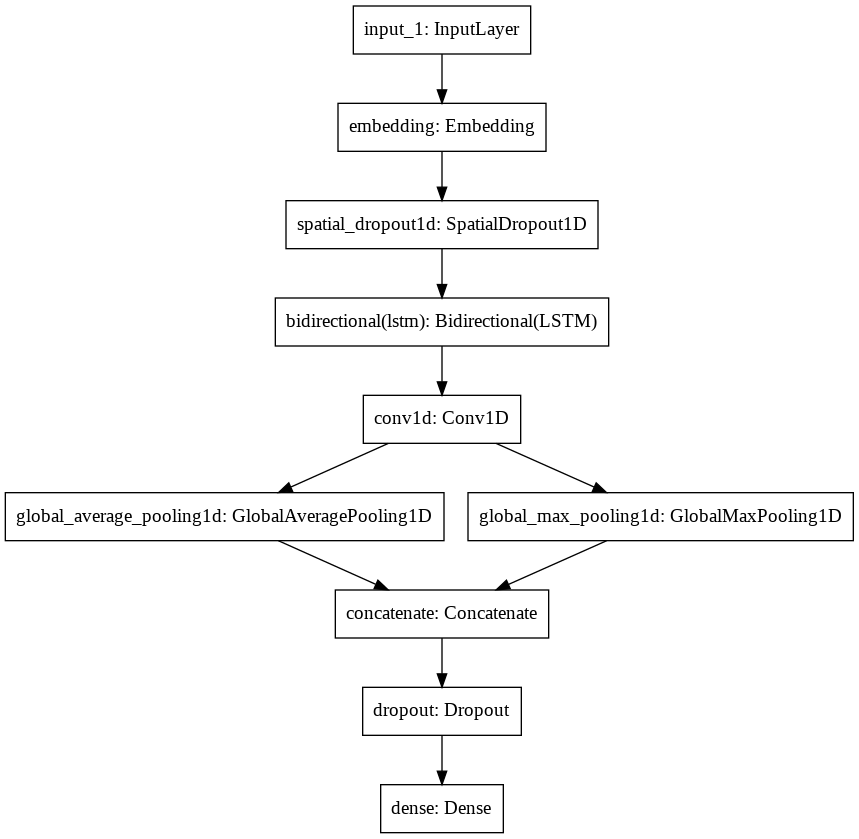

In [ ]:
plot_model(model)

In [ ]:
callbacks = [
            #  EarlyStopping(patience=3),
             ModelCheckpoint(filepath='model-cnn-lstm.h5', save_best_only=True)
            ]

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/15
47/47 [==============================] - 42s 832ms/step - loss: 0.3512 - accuracy: 0.2521 - val_loss: 0.1562 - val_accuracy: 0.5155
Epoch 2/15
47/47 [==============================] - 38s 811ms/step - loss: 0.1617 - accuracy: 0.4657 - val_loss: 0.1535 - val_accuracy: 0.5170
Epoch 3/15
47/47 [==============================] - 38s 818ms/step - loss: 0.1559 - accuracy: 0.4792 - val_loss: 0.1457 - val_accuracy: 0.4825
Epoch 4/15
47/47 [==============================] - 38s 811ms/step - loss: 0.1452 - accuracy: 0.4131 - val_loss: 0.1361 - val_accuracy: 0.3900
Epoch 5/15
47/47 [==============================] - 38s 812ms/step - loss: 0.1349 - accuracy: 0.3947 - val_loss: 0.1318 - val_accuracy: 0.4435
Epoch 6/15
47/47 [==============================] - 38s 813ms/step - loss: 0.1280 - accuracy: 0.4323 - val_loss: 0.1260 - val_accuracy: 0.4345
Epoch 7/15
47/47 [==============================] - 38s 815ms/step - loss: 0.1198 - accuracy: 0.4422 - val_loss: 0.1222 - val_accuracy: 0.4275

### Predict

In [ ]:
preds = model.predict(x_test)

In [ ]:
print(y_test[0])
print(preds[0])

[1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.15642843 0.00513548 0.05702417 0.07412627 0.02610114 0.04777661
 0.00282676 0.02983481 0.0007136  0.119866   0.00505354 0.09982742
 0.09308866 0.03402109 0.08747964 0.01887841 0.00128716 0.17079918
 0.01579406 0.07502391 0.00681542 0.02626359 0.03522089 0.02370107
 0.02723123 0.00201753 0.00180419 0.04757922 0.00159797 0.01099917
 0.00617298 0.00428687 0.02034601 0.00033542 0.01844261 0.00544675
 0.00378566 0.01181512 0.00182562 0.05685171 0.00943242 0.00127521
 0.00085154 0.01846584 0.00090879 0.00031539 0.00210553 0.00186486
 0.00441759 0.00030834 0.00427633 0.04232186 0.00174661 0.00366715
 0.0021578  0.02093055 0.00018994 0.00918353 0.00533599 0.02006719
 0.00035377 0.0017586  0.00111737 0.0070921  0.00503077 0.00059585
 0.00199674 0.00433086 0.00245848 0.00785224]


In [ ]:
from sklearn.metrics import f1_score

threshold = [i*0.01 for i in range(100)]
f1_score_list = []
for t in threshold:
  preds_int = (preds >= t).astype(int)
  f1_score_list.append(f1_score(y_test, preds_int, average="weighted"))

In [ ]:
len(threshold)
len(f1_score_list)

100

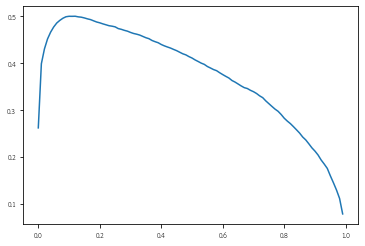

In [ ]:
import matplotlib.pyplot as plt
plt.plot(threshold, f1_score_list)
plt.show()

In [ ]:
# max(f1_score_list)
opt_threshold = threshold[f1_score_list.index(max(f1_score_list))]
print(opt_threshold)
print(max(f1_score_list))

0.12
0.49898503876081046


### Example

In [ ]:
tags_pred = model.predict(padded_content)

In [ ]:
def example_pred(i):
  print(df_content['topic_id'][i])
  print(df_content['title'][i])
  print('=====')
  print(df_content['content'][i][:500])
  print('=====')
  print('Actual Tag')
  print(df_content['tags'][i])
  print('=====')
  print('Predicted Tags')

  tags_pred_idx = tags_pred[i] >= opt_threshold
  tags_pred_i = []
  for j, k in enumerate(tags_pred_idx):
    if k:
      tags_pred_i.append(idx_to_tag[j])
  print(tags_pred_i)
  print('=====')
  print('Corrected')
  corrected_tags = set(tags_pred_i).intersection(set(df_content['tags'][i]))
  print(corrected_tags)
  print('=======================')
  print('=======================\n')

example_pred(501)
example_pred(627)
example_pred(8627)
example_pred(7532)

40482209
[Travelling As A Couple] ทริปพักผ่อนชิลๆ ที่กระบี่ ที่พักดีงาม Pimalai Resort &Spa
=====


หลังจากโควิดระบาดเราก็ไม่ได้นั่งเครื่องบินออกนอกประเทศเลย เลยต้องหาที่เที่ยวในประเทศ ไปเที่ยวพักผ่อนบ้าง สำหรับบ้านเราถ้าให้เลือกระหว่างทะเลกับภูเขา ทะเลก็ยังคงเป็นที่หนึ่งในใจเสมอ

ทริปนี้เลยเลือกมาทะเลทางใต้ดูบ้าง ก่อนหน้าไปหัวหิน พัทยา มาจนเบื่อแล้ว แต่ลงใต้มาหลายที แต่ยังไม่เคยได้แวะเวียนมาเที่ยวกระบี่ซักที และนี่คือครั้งแรกที่เราจะไปเที่ยวกระบี่ ทริปนี้กะไว้แล้วว่าไปเที่ยวแบบพักผ่อนจริงๆ นอนอยู่โรงแรม เล่นน้ำ ทำกิจกรรมภายในโรงแรม ไม่ออกไปไหนเยอะ เพื่อลดความเสี่ยงหลายๆ อย่าง เลยต้องเลือกโร
=====
Actual Tag
['เที่ยวทะเล', 'จังหวัดกระบี่', 'บันทึกนักเดินทาง', 'สถานที่ท่องเที่ยวในประเทศ', 'สถานที่ท่องเที่ยวสำหรับครอบครัว']
=====
Predicted Tags
['บันทึกนักเดินทาง', 'เที่ยวไทย', 'สถานที่ท่องเที่ยวในประเทศ', 'โรงแรมรีสอร์ท', 'เที่ยวทะเล', 'ท่องเที่ยว', 'โรงแรมรีสอร์ทไทย', 'สถานที่ท่องเที่ยวสำหรับครอบครัว', 'จังหวัดภูเก็ต', 'ที่พัก']
=====
Corrected
{'บันทึกนักเดินทาง', 'เที่ยวทะเล', 'สถานท

## Multi-CNN

In [ ]:
# model.compile(optimizer='adam', 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

model = get_mCNN(max_length, vocab_size, n_tags)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1288)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1288, 256)    30587904    input_2[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 1288, 256, 1) 0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1287, 1, 256) 131328      reshape[0][0]                    
____________________________________________________________________________________________

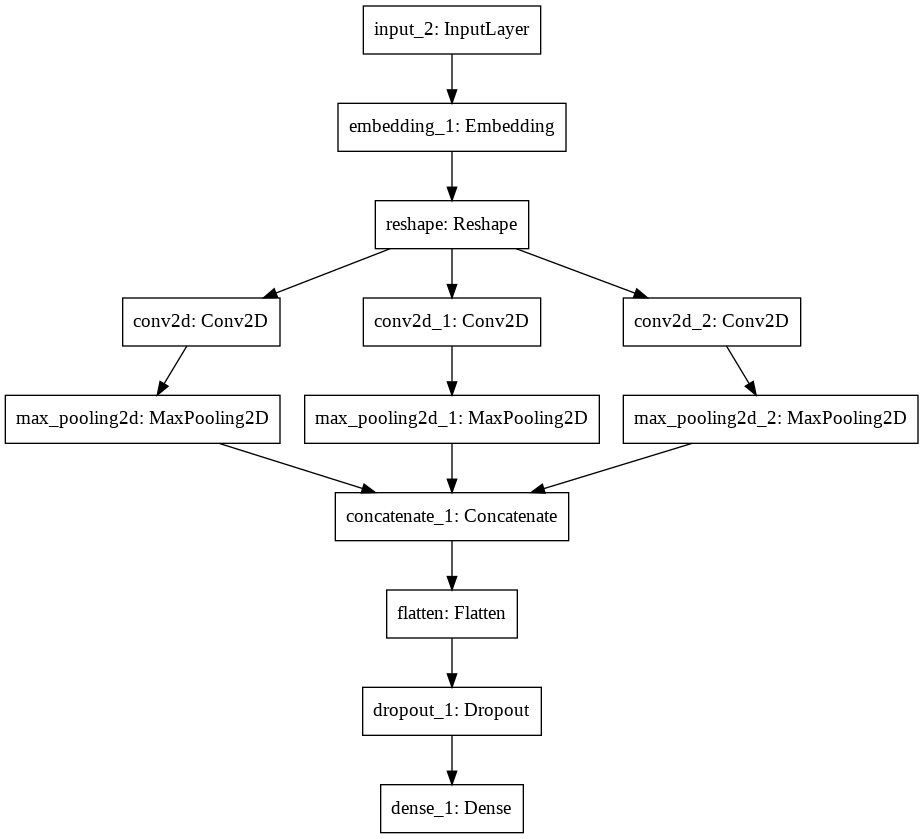

In [ ]:
plot_model(model)

In [ ]:
callbacks = [
            #  EarlyStopping(patience=3),
             ModelCheckpoint(filepath='model-cnn.h5', save_best_only=True)
            ]

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/15
47/47 [==============================] - 1752s 18s/step - loss: 0.3716 - acc: 0.3559 - val_loss: 0.1574 - val_acc: 0.5155
Epoch 2/15
47/47 [==============================] - 35s 738ms/step - loss: 0.1564 - acc: 0.5157 - val_loss: 0.1504 - val_acc: 0.5290
Epoch 3/15
47/47 [==============================] - 35s 741ms/step - loss: 0.1469 - acc: 0.5226 - val_loss: 0.1400 - val_acc: 0.4620
Epoch 4/15
47/47 [==============================] - 35s 742ms/step - loss: 0.1338 - acc: 0.4797 - val_loss: 0.1292 - val_acc: 0.4775
Epoch 5/15
47/47 [==============================] - 35s 737ms/step - loss: 0.1227 - acc: 0.4650 - val_loss: 0.1211 - val_acc: 0.4635
Epoch 6/15
47/47 [==============================] - 35s 739ms/step - loss: 0.1120 - acc: 0.4748 - val_loss: 0.1157 - val_acc: 0.4390
Epoch 7/15
47/47 [==============================] - 35s 744ms/step - loss: 0.1035 - acc: 0.4726 - val_loss: 0.1111 - val_acc: 0.4375
Epoch 8/15
47/47 [==============================] - 35s 743ms/step - 

### Predict

In [ ]:
preds = model.predict(x_test)

In [ ]:
print(y_test[0])
print(preds[0])

[1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3.44712913e-01 1.52967703e-02 1.06259011e-01 1.77097842e-02
 1.69162471e-02 3.36035155e-02 1.65901519e-02 2.27023996e-02
 1.17777311e-03 4.86382633e-01 9.67931747e-03 4.94072586e-02
 2.89142411e-02 1.09645659e-02 7.41148461e-03 6.05610665e-03
 1.11438672e-03 5.41404895e-02 6.66857371e-03 8.58765244e-02
 4.29703528e-03 1.61520094e-02 1.12606995e-02 1.37043064e-02
 1.42286113e-02 3.74570885e-03 1.17411022e-03 3.31293046e-02
 1.44551671e-03 3.06391343e-03 2.29946128e-03 2.18585599e-03
 3.68490722e-03 1.63608478e-04 1.05477963e-02 9.63194936e-04
 8.27893746e-05 2.79785227e-03 3.17567470e-03 5.59989177e-03
 1.13549568e-02 2.96195014e-03 4.21411736e-04 6.50878400e-02
 1.66637846e-03 1.24422149e-04 8.41226615e-03 1.57404260e-03
 1.21557887e-03 1.28280313e-04 1.81743701e-03 1.24998661e-02
 4.49679093e-03 1.03437703e-03 7.68995378e-04 3.08681605e-03
 1.

In [ ]:
from sklearn.metrics import f1_score

threshold = [i*0.01 for i in range(100)]
f1_score_list = []
for t in threshold:
  preds_int = (preds >= t).astype(int)
  f1_score_list.append(f1_score(y_test, preds_int, average="weighted"))

In [ ]:
len(threshold)
len(f1_score_list)

100

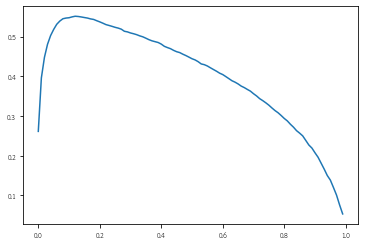

In [ ]:
import matplotlib.pyplot as plt
plt.plot(threshold, f1_score_list)
plt.show()

In [ ]:
# max(f1_score_list)
opt_threshold = threshold[f1_score_list.index(max(f1_score_list))]
print(opt_threshold)
print(max(f1_score_list))

0.12
0.5512896393641281


### Example

In [ ]:
tags_pred = model.predict(padded_content)

In [ ]:
def example_pred(i):
  print(df_content['topic_id'][i])
  print(df_content['title'][i])
  print('=====')
  print(df_content['content'][i][:500])
  print('=====')
  print('Actual Tag')
  print(df_content['tags'][i])
  print('=====')
  print('Predicted Tags')

  tags_pred_idx = tags_pred[i] >= opt_threshold
  tags_pred_i = []
  for j, k in enumerate(tags_pred_idx):
    if k:
      tags_pred_i.append(idx_to_tag[j])
  print(tags_pred_i)
  print('=====')
  print('Corrected')
  corrected_tags = set(tags_pred_i).intersection(set(df_content['tags'][i]))
  print(corrected_tags)
  print('=======================')
  print('=======================\n')

example_pred(501)
example_pred(627)
example_pred(8627)
example_pred(7532)

40482209
[Travelling As A Couple] ทริปพักผ่อนชิลๆ ที่กระบี่ ที่พักดีงาม Pimalai Resort &Spa
=====


หลังจากโควิดระบาดเราก็ไม่ได้นั่งเครื่องบินออกนอกประเทศเลย เลยต้องหาที่เที่ยวในประเทศ ไปเที่ยวพักผ่อนบ้าง สำหรับบ้านเราถ้าให้เลือกระหว่างทะเลกับภูเขา ทะเลก็ยังคงเป็นที่หนึ่งในใจเสมอ

ทริปนี้เลยเลือกมาทะเลทางใต้ดูบ้าง ก่อนหน้าไปหัวหิน พัทยา มาจนเบื่อแล้ว แต่ลงใต้มาหลายที แต่ยังไม่เคยได้แวะเวียนมาเที่ยวกระบี่ซักที และนี่คือครั้งแรกที่เราจะไปเที่ยวกระบี่ ทริปนี้กะไว้แล้วว่าไปเที่ยวแบบพักผ่อนจริงๆ นอนอยู่โรงแรม เล่นน้ำ ทำกิจกรรมภายในโรงแรม ไม่ออกไปไหนเยอะ เพื่อลดความเสี่ยงหลายๆ อย่าง เลยต้องเลือกโร
=====
Actual Tag
['เที่ยวทะเล', 'จังหวัดกระบี่', 'บันทึกนักเดินทาง', 'สถานที่ท่องเที่ยวในประเทศ', 'สถานที่ท่องเที่ยวสำหรับครอบครัว']
=====
Predicted Tags
['บันทึกนักเดินทาง', 'เที่ยวไทย', 'สถานที่ท่องเที่ยวในประเทศ', 'เที่ยวทะเล', 'สถานที่ท่องเที่ยวสำหรับครอบครัว']
=====
Corrected
{'บันทึกนักเดินทาง', 'เที่ยวทะเล', 'สถานที่ท่องเที่ยวในประเทศ', 'สถานที่ท่องเที่ยวสำหรับครอบครัว'}

40437348
อุบลราชธาน

## LSTM

In [ ]:
# model.compile(optimizer='adam', 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

model = get_LSTM(max_length, vocab_size, n_tags)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1288)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 1288, 300)         35845200  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1288, 300)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1284, 300)         450300    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               439296    
_________________________________________________________________
dense_3 (Dense)              (None, 70)                17990     
Total params: 36,752,786
Trainable params: 36,752,786
Non-trainable params: 0
_______________________________________________

In [ ]:
callbacks = [
            #  EarlyStopping(patience=3),
             ModelCheckpoint(filepath='model-lstm.h5', save_best_only=True)
            ]

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/15
47/47 [==============================] - 475s 10s/step - loss: 0.3701 - acc: 0.4384 - val_loss: 0.1573 - val_acc: 0.5155
Epoch 2/15
47/47 [==============================] - 457s 10s/step - loss: 0.1563 - acc: 0.5200 - val_loss: 0.1552 - val_acc: 0.5155
Epoch 3/15
47/47 [==============================] - 461s 10s/step - loss: 0.1544 - acc: 0.5156 - val_loss: 0.1514 - val_acc: 0.4955
Epoch 4/15
47/47 [==============================] - 457s 10s/step - loss: 0.1471 - acc: 0.5036 - val_loss: 0.1462 - val_acc: 0.4270
Epoch 5/15
47/47 [==============================] - 455s 10s/step - loss: 0.1377 - acc: 0.4714 - val_loss: 0.1418 - val_acc: 0.4550
Epoch 6/15
47/47 [==============================] - 448s 10s/step - loss: 0.1302 - acc: 0.5408 - val_loss: 0.1406 - val_acc: 0.4425
Epoch 7/15
47/47 [==============================] - 449s 10s/step - loss: 0.1261 - acc: 0.5828 - val_loss: 0.1394 - val_acc: 0.4400
Epoch 8/15
47/47 [==============================] - 452s 10s/step - loss: 0.

### Predict

In [ ]:
preds = model.predict(x_test)

In [ ]:
print(y_test[0])
print(preds[0])

[1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3.0280557e-01 1.4351488e-03 9.3734270e-01 4.4836682e-01 6.1049487e-04
 9.5027849e-02 4.8430832e-03 2.7530463e-02 2.2042624e-03 1.0584107e-02
 3.5420642e-03 5.7637177e-02 4.9780570e-02 7.4146092e-02 1.4188437e-02
 2.8621312e-03 6.9504295e-04 2.8730083e-02 1.0598063e-04 1.0080998e-02
 9.3486143e-04 1.1306849e-02 2.7730747e-03 3.4449038e-03 5.2142972e-03
 2.3708080e-01 1.8769249e-03 3.1104231e-02 9.8843721e-04 2.9854677e-04
 6.0571514e-02 4.6399448e-04 4.3673636e-03 2.4828030e-04 5.1985211e-03
 1.3468048e-03 2.3277293e-04 2.7834901e-03 3.7179599e-04 3.2070531e-03
 4.6012416e-03 3.4282815e-02 6.2471733e-04 1.7870417e-02 1.2117594e-03
 1.9604026e-03 2.2880360e-03 8.3564259e-03 1.7823871e-02 2.4690450e-04
 1.5727408e-02 4.7682840e-03 2.7069959e-03 1.5135811e-02 1.2987582e-02
 6.7953654e-03 3.1817207e-04 1.7411768e-02 4.2078856e-04 2.3080057e-03
 1.32

In [ ]:
from sklearn.metrics import f1_score

threshold = [i*0.01 for i in range(100)]
f1_score_list = []
for t in threshold:
  preds_int = (preds >= t).astype(int)
  f1_score_list.append(f1_score(y_test, preds_int, average="weighted"))

In [ ]:
len(threshold)
len(f1_score_list)

100

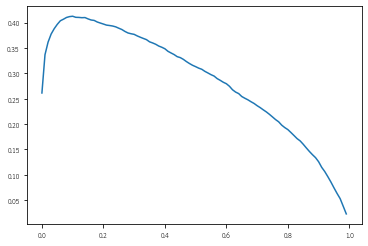

In [ ]:
import matplotlib.pyplot as plt
plt.plot(threshold, f1_score_list)
plt.show()

In [ ]:
# max(f1_score_list)
opt_threshold = threshold[f1_score_list.index(max(f1_score_list))]
print(opt_threshold)
print(max(f1_score_list))

0.1
0.4125075543423088


### Example

In [ ]:
tags_pred = model.predict(padded_content)

In [ ]:
def example_pred(i):
  print(df_content['topic_id'][i])
  print(df_content['title'][i])
  print('=====')
  print(df_content['content'][i][:500])
  print('=====')
  print('Actual Tag')
  print(df_content['tags'][i])
  print('=====')
  print('Predicted Tags')

  tags_pred_idx = tags_pred[i] >= opt_threshold
  tags_pred_i = []
  for j, k in enumerate(tags_pred_idx):
    if k:
      tags_pred_i.append(idx_to_tag[j])
  print(tags_pred_i)
  print('=====')
  print('Corrected')
  corrected_tags = set(tags_pred_i).intersection(set(df_content['tags'][i]))
  print(corrected_tags)
  print('=======================')
  print('=======================\n')

example_pred(501)
example_pred(627)
example_pred(8627)
example_pred(7532)

40482209
[Travelling As A Couple] ทริปพักผ่อนชิลๆ ที่กระบี่ ที่พักดีงาม Pimalai Resort &Spa
=====


หลังจากโควิดระบาดเราก็ไม่ได้นั่งเครื่องบินออกนอกประเทศเลย เลยต้องหาที่เที่ยวในประเทศ ไปเที่ยวพักผ่อนบ้าง สำหรับบ้านเราถ้าให้เลือกระหว่างทะเลกับภูเขา ทะเลก็ยังคงเป็นที่หนึ่งในใจเสมอ

ทริปนี้เลยเลือกมาทะเลทางใต้ดูบ้าง ก่อนหน้าไปหัวหิน พัทยา มาจนเบื่อแล้ว แต่ลงใต้มาหลายที แต่ยังไม่เคยได้แวะเวียนมาเที่ยวกระบี่ซักที และนี่คือครั้งแรกที่เราจะไปเที่ยวกระบี่ ทริปนี้กะไว้แล้วว่าไปเที่ยวแบบพักผ่อนจริงๆ นอนอยู่โรงแรม เล่นน้ำ ทำกิจกรรมภายในโรงแรม ไม่ออกไปไหนเยอะ เพื่อลดความเสี่ยงหลายๆ อย่าง เลยต้องเลือกโร
=====
Actual Tag
['เที่ยวทะเล', 'จังหวัดกระบี่', 'บันทึกนักเดินทาง', 'สถานที่ท่องเที่ยวในประเทศ', 'สถานที่ท่องเที่ยวสำหรับครอบครัว']
=====
Predicted Tags
['บันทึกนักเดินทาง', 'เที่ยวไทย', 'สถานที่ท่องเที่ยวในประเทศ', 'โรงแรมรีสอร์ท', 'ภาพถ่ายทิวทัศน์', 'One_Day_Trip', 'คาเฟ่_(Cafe)', 'สถานที่ท่องเที่ยวสำหรับครอบครัว', 'ร้านกาแฟ']
=====
Corrected
{'บันทึกนักเดินทาง', 'สถานที่ท่องเที่ยวในประเทศ', 'สถ